# Metrics and Plots for the trained models

This notebook aims to viz results from metrics that were already saved in `results/scores_tables`

> [!NOTE]  
> normalization only applied to create protein embeddings

This notebook shows only protein embeddings performance along with gene expreession, as they are super competitive

## Viz

In [12]:
version='v2.11'
norm='minmax'

In [13]:
import pandas as pd
import sys,os
sys.path.append(os.path.abspath('../../../src/ml'))


from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer



In [14]:
avg_df=pd.read_csv('../../../results/score_tables/scores_avg_seeds.csv')
all_df=pd.read_csv('../../../results/score_tables/scores_all_seeds.csv')

In [15]:
input_data=[
 'gene_expression',

 'Complex_protein_embeddings',
 'RGCN_protein_embeddings',
 'weighted_RGCN_protein_embeddings',
 'GraphSAGE_protein_embeddings',
 'GAT_protein_embeddings',
#  'concatenated_protein_embeddings',

#  'Complex_sample_embeddings',
#  'RGCN_sample_embeddings',
#  'weighted_RGCN_sample_embeddings',
#  'GraphSAGE_sample_embeddings',
#  'GAT_sample_embeddings'
#  'concatenated_sample_embeddings'
]

In [16]:
df=avg_df
filtered_results=df[
        (df['input']=='gene_expression') 
        | ((df['version']==version) & (df['normalization']==norm))
        | (
            (norm != 'none')
            & df['input'].isin([
                'RGCN_sample_embeddings',
                'Complex_sample_embeddings',
                'concatenated_sample_embeddings'
            ])
            & (df['version']==version)
        )
]


For better foucsed results, consider only non pytorch mlp models and CompEx and RGCN only (the others gnns are not done yet)

So run this if metrics files contatin them

In [17]:
filtered_results=filtered_results[filtered_results['model']!='pytorch_mlp']
# -- only input in input_data
filtered_results=filtered_results[filtered_results['input'].isin(input_data)]

In [18]:


SECONDARY_COLORS = {
    1: "#C60B46",  # pms-1945
    2: "#ED145B",  # pms-206
    3: "#EE3524",  # pms-1795
    4: "#F37320",  # pms-1665
    5: "#7C2A90",  # pms-2602
    6: "#7D6AAF",  # pms-2725
    7: "#C6671D", # pms-153
    8: "#FEBC18", # pms-123
    9: "#004E7D",  # pms-295
    10: "#0E87C9", # pms-2935
    11: "#0094B5", # pms-314
    12: "#46C3D2", # pms-3115
    13: "#00807A",  # pms-3292
    14: "#40B769", # pms-355
    15: "#8CC63E", # pms-376
    16: "#D5DF3D" # pms-381
}

dataset_colors={
    'gene_expression': SECONDARY_COLORS[2],# -- redish
    'Complex_protein_embeddings': SECONDARY_COLORS[11],
    'GAT_protein_embeddings': SECONDARY_COLORS[4],
    'GraphSAGE_protein_embeddings': SECONDARY_COLORS[14],
    'RGCN_protein_embeddings': SECONDARY_COLORS[6],
    'weighted_RGCN_protein_embeddings': SECONDARY_COLORS[8],
}
# -- replace _protein_embeddings with '' in results_df['input'] and dataset_colors keys
dataset_colors={k.replace('_protein_embeddings', ''): v for k, v in dataset_colors.items()}

filtered_results['input'] = filtered_results['input'].str.replace('_protein_embeddings', '')

### 1. grouped bar plots

/tmp/ipykernel_2716/14609292.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels, rotation=45, ha='right')
/tmp/ipykernel_2716/14609292.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels, rotation=45, ha='right')
/tmp/ipykernel_2716/14609292.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels, rotation=45, ha='right')
/tmp/ipykernel_2716/14609292.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels, rotation=45, ha='right')


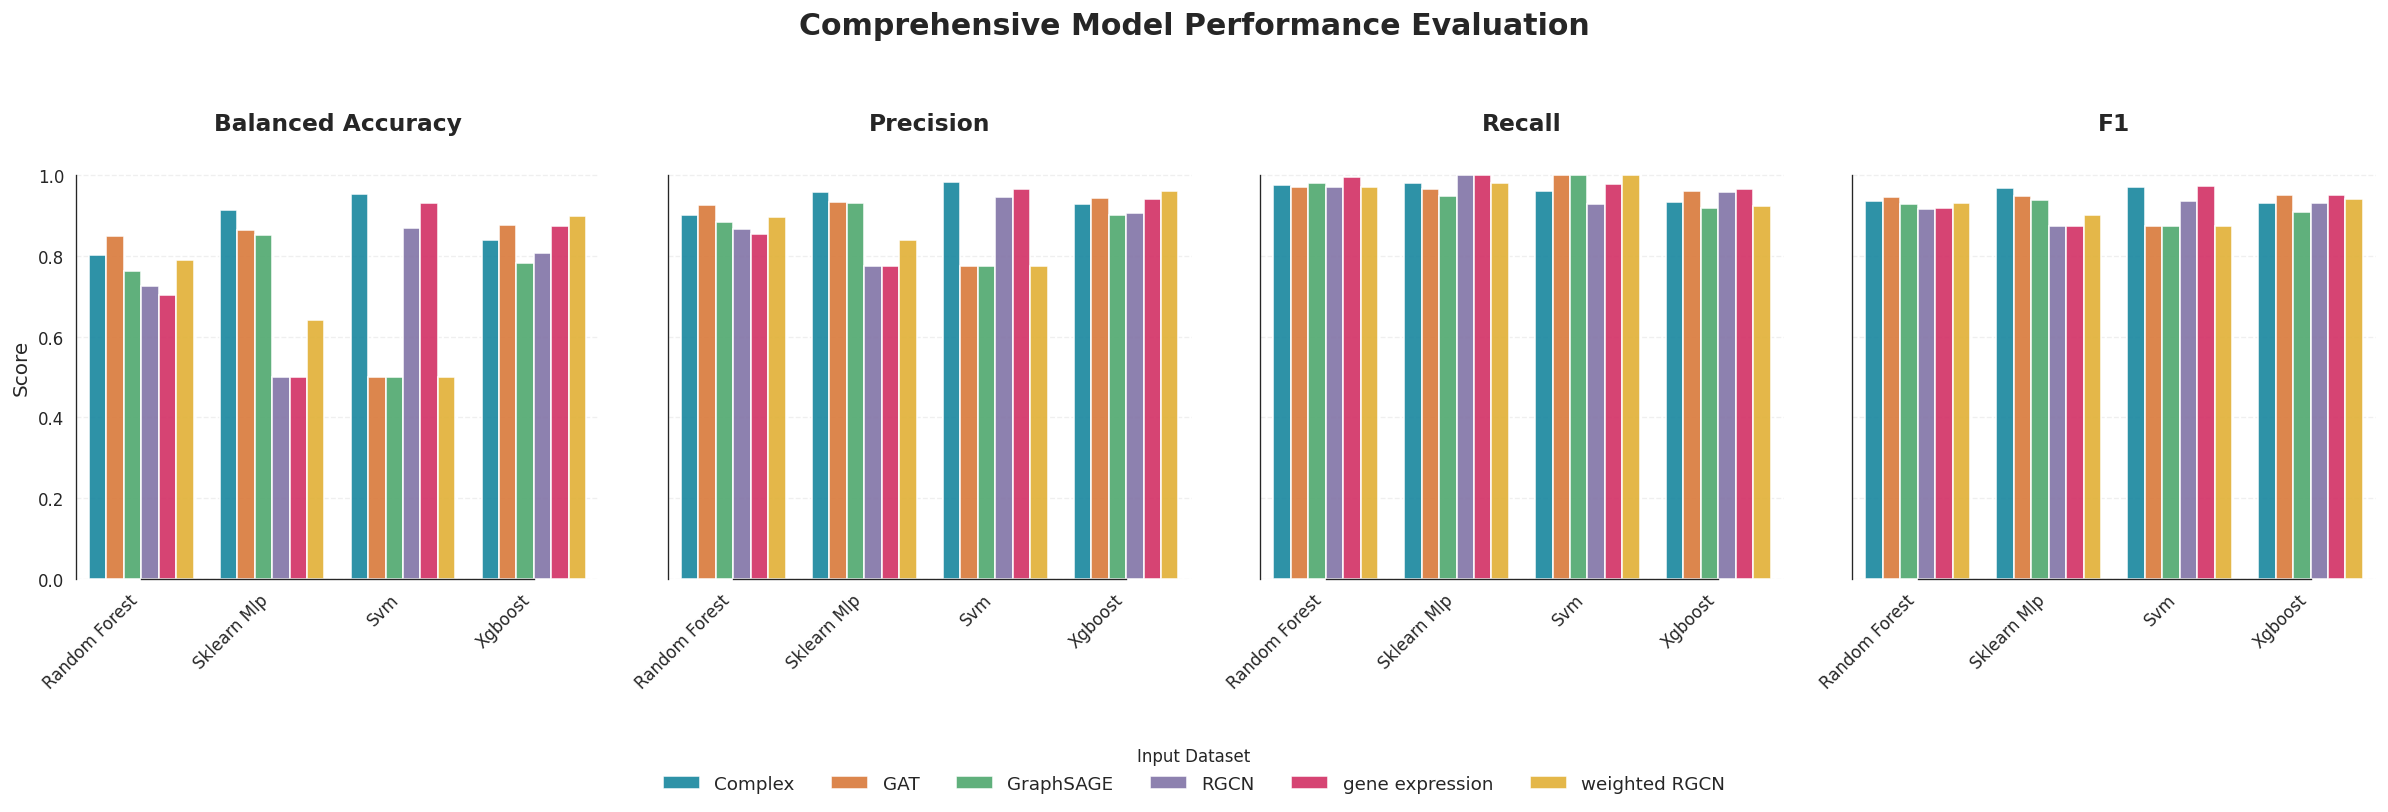

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Configuration
metrics = ['balanced_accuracy', 'precision', 'recall', 'f1']
# Formatting titles for the subplots
metric_titles = [m.replace('_', ' ').title() for m in metrics]

# 2. Setup Figure and Style
sns.set_style("white")
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': 10})

# Create 1 row, 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True, dpi=120)

# 3. Iterative Plotting
for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Using sns.barplot to handle grouping (x=model) and sub-grouping (hue=input)
    sns.barplot(
        data=filtered_results,
        x='model',
        y=metric,
        hue='input',
        palette=dataset_colors,
        edgecolor='white',
        linewidth=1,
        alpha=0.9,
        ax=ax,
        errorbar=None # Set to 'sd' if you want error bars for variance
    )
    
    # Subplot Styling
    ax.set_title(metric_titles[i], fontsize=14, weight='bold', pad=15)
    ax.set_xlabel('') # Remove individual x-labels to reduce clutter
    ax.set_ylabel('Score' if i == 0 else '', fontsize=12) # Only show Y label on first plot
    
    # Clean up X-axis tick labels (Model names)
    model_labels = [tick.get_text().replace('_', ' ').title() for tick in ax.get_xticklabels()]
    ax.set_xticklabels(model_labels, rotation=45, ha='right')
    
    # Grid and Despine
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    sns.despine(ax=ax, trim=True)
    
    # Remove individual legends; we will create one global legend
    ax.get_legend().remove()

# 4. Global Legend Creation
# We pull labels from the last axis and clean them
handles, labels = axes[-1].get_legend_handles_labels()
clean_labels = [l.replace('_protein_embeddings', '').replace('_', ' ') for l in labels]

fig.legend(
    handles, 
    clean_labels, 
    title='Input Dataset',
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.05), # Positioned at the bottom
    ncol=len(clean_labels),
    frameon=False,
    fontsize=11
)

# 5. Final Layout Adjustments
plt.suptitle('Comprehensive Model Performance Evaluation', fontsize=18, weight='bold', y=1.05)
plt.tight_layout(rect=[0, 0.08, 1, 1]) # Make room for the legend at bottom
plt.show()

/tmp/ipykernel_2716/218473144.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(clean_model_names)


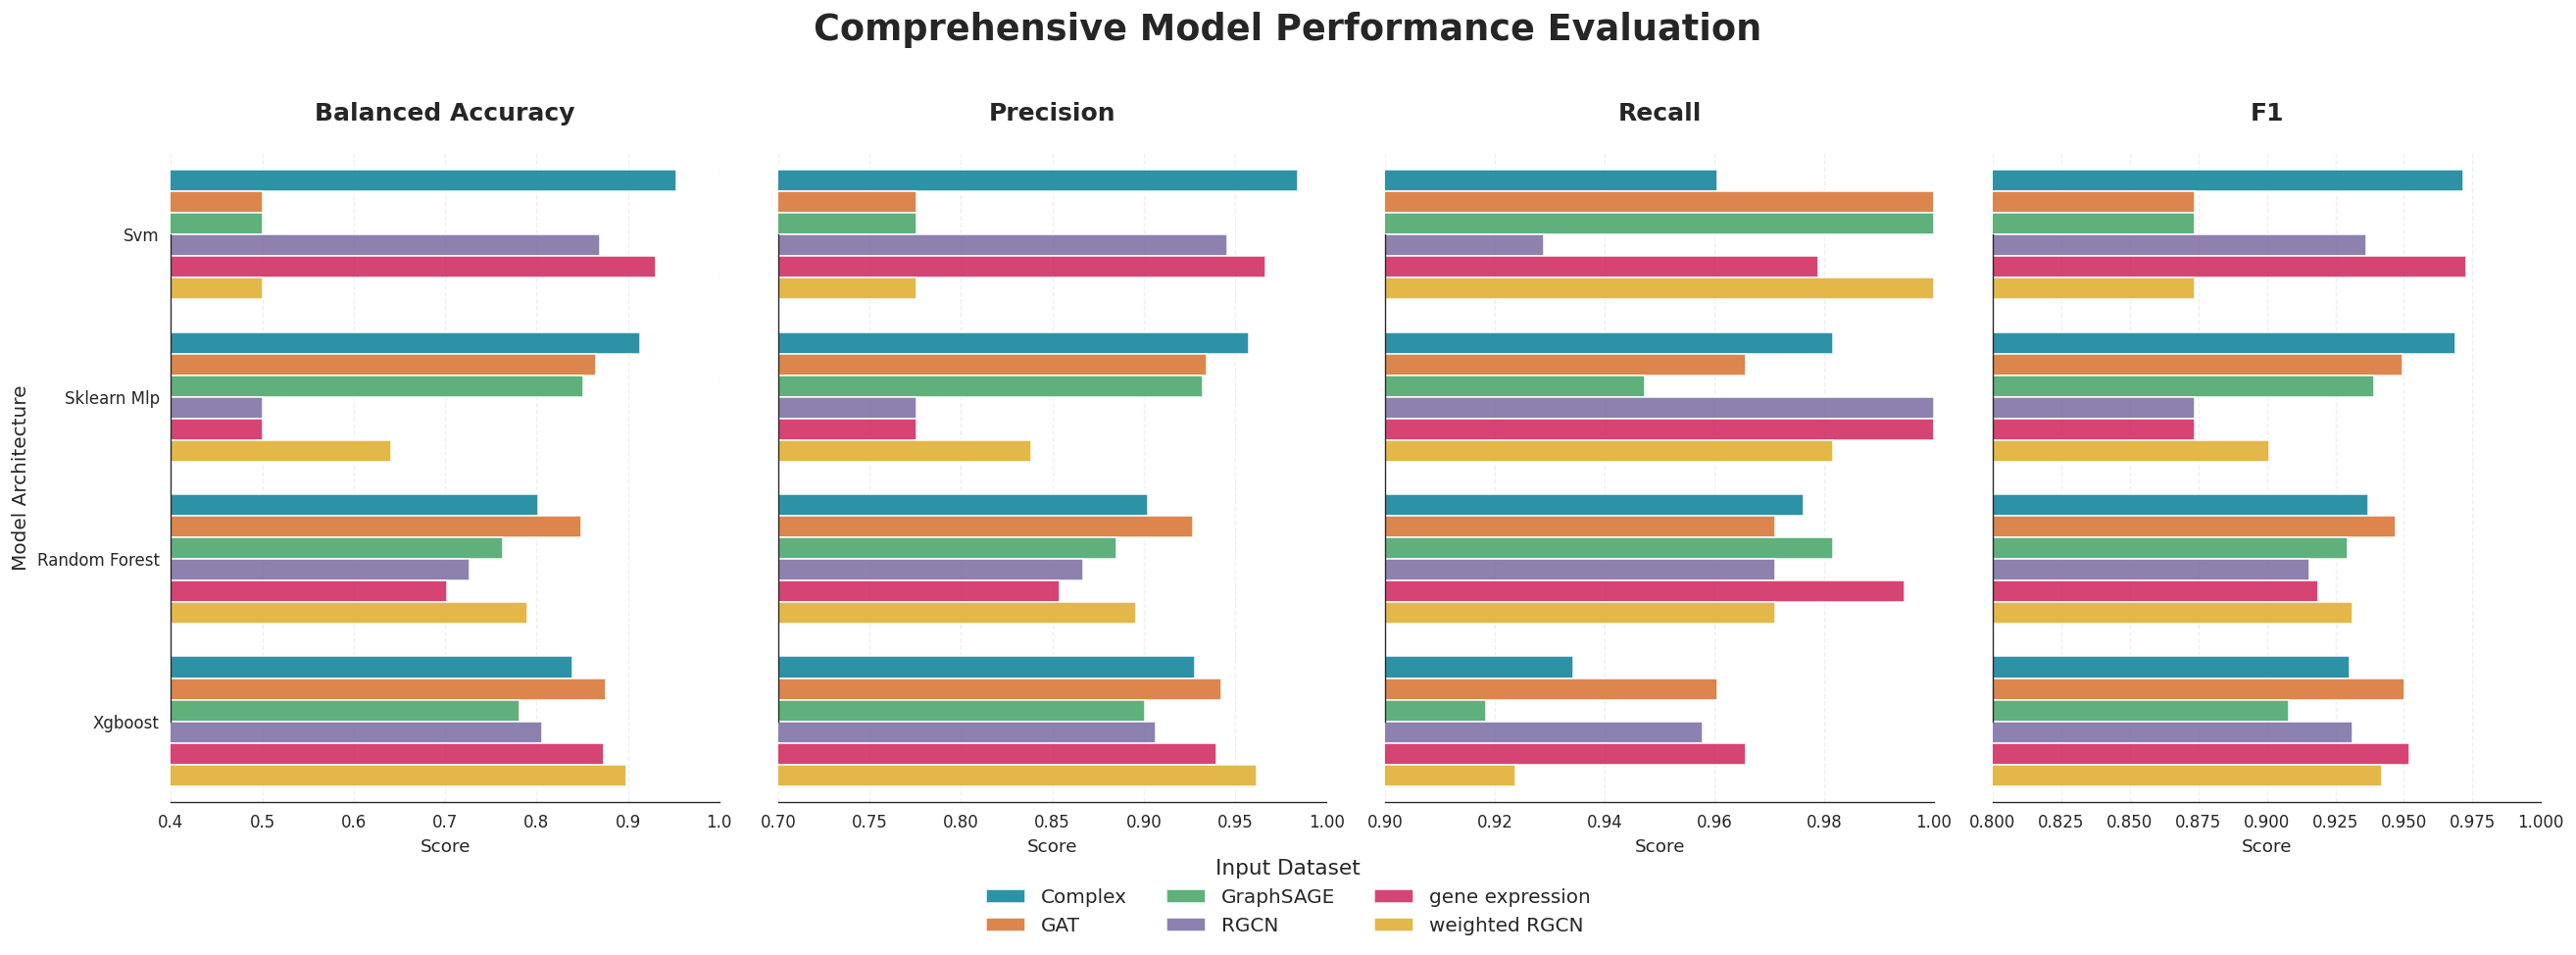

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sort models by performance (Leaderboard ranking)
# We use the mean of the first metric to define the vertical order
avg_performance = filtered_results.groupby('model')['balanced_accuracy'].mean().sort_values(ascending=True)
sorted_models = avg_performance.index.tolist()

# 2. Configuration
metrics = ['balanced_accuracy', 'precision', 'recall', 'f1']
metric_titles = [m.replace('_', ' ').title() for m in metrics]

# 3. Setup Figure and Global Style
sns.set_style("white")
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': 10})

# Create 1 row, 4 columns
fig, axes = plt.subplots(1, 4, figsize=(22, 8), sharey=True, dpi=120)

# 4. Iterative Plotting
for i, metric in enumerate(metrics):
    ax = axes[i]
    
    sns.barplot(
        data=filtered_results,
        y='model',
        x=metric,
        order=sorted_models, # Consistent order across all panels
        hue='input',
        palette=dataset_colors,
        edgecolor='white',
        linewidth=1,
        alpha=0.9,
        ax=ax,
        orient='h',
        errorbar=None
    )
    
    # --- START X AT: ---
    if i==0:
        ax.set_xlim(0.4, 1.0) 
    elif i==1:
        ax.set_xlim(0.7, 1.0) 
    elif i==2:
        ax.set_xlim(0.9, 1.0)
    elif i==3:
        ax.set_xlim(0.8, 1.0)  
    # ----------------------

    # Subplot Styling
    ax.set_title(metric_titles[i], fontsize=15, weight='bold', pad=20)
    ax.set_ylabel('Model Architecture' if i == 0 else '', fontsize=12)
    ax.set_xlabel('Score', fontsize=11)
    
    # Clean up Model Names for the Y-axis (only needed for the first plot)
    if i == 0:
        # We manually set the labels to ensure they are clean and formatted
        clean_model_names = [m.replace('_', ' ').title() for m in sorted_models]
        ax.set_yticklabels(clean_model_names)
    
    # Add vertical gridlines for precision
    ax.xaxis.grid(True, linestyle='--', alpha=0.3, zorder=0)
    ax.set_axisbelow(True) 
    
    sns.despine(ax=ax, trim=True)
    
    # Remove individual legends
    if ax.get_legend():
        ax.get_legend().remove()

# 5. Global Legend (Placed at the bottom)
handles, labels = axes[0].get_legend_handles_labels()
clean_labels = [l.replace('_protein_embeddings', '').replace('_', ' ') for l in labels]

fig.legend(
    handles, 
    clean_labels, 
    title='Input Dataset',
    loc='lower center', 
    bbox_to_anchor=(0.5, 0.02),
    ncol=3,
    frameon=False,
    fontsize=12,
    title_fontsize=13
)

# 6. Final Layout Adjustments
plt.suptitle('Comprehensive Model Performance Evaluation', fontsize=22, weight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(bottom=0.18) # Space for the global legend


# -- save this in ../../../results/figures/metrics/protein_grouped_barplots_horizontal.png
# plt.suptitle('Comprehensive Model Performance Evaluation', fontsize=22, weight='bold', y=1.02)
# plt.tight_layout()
plt.savefig('../../../results/figures/metrics/protein_grouped_barplots_horizontal.png', dpi=120, bbox_inches='tight')

plt.show()

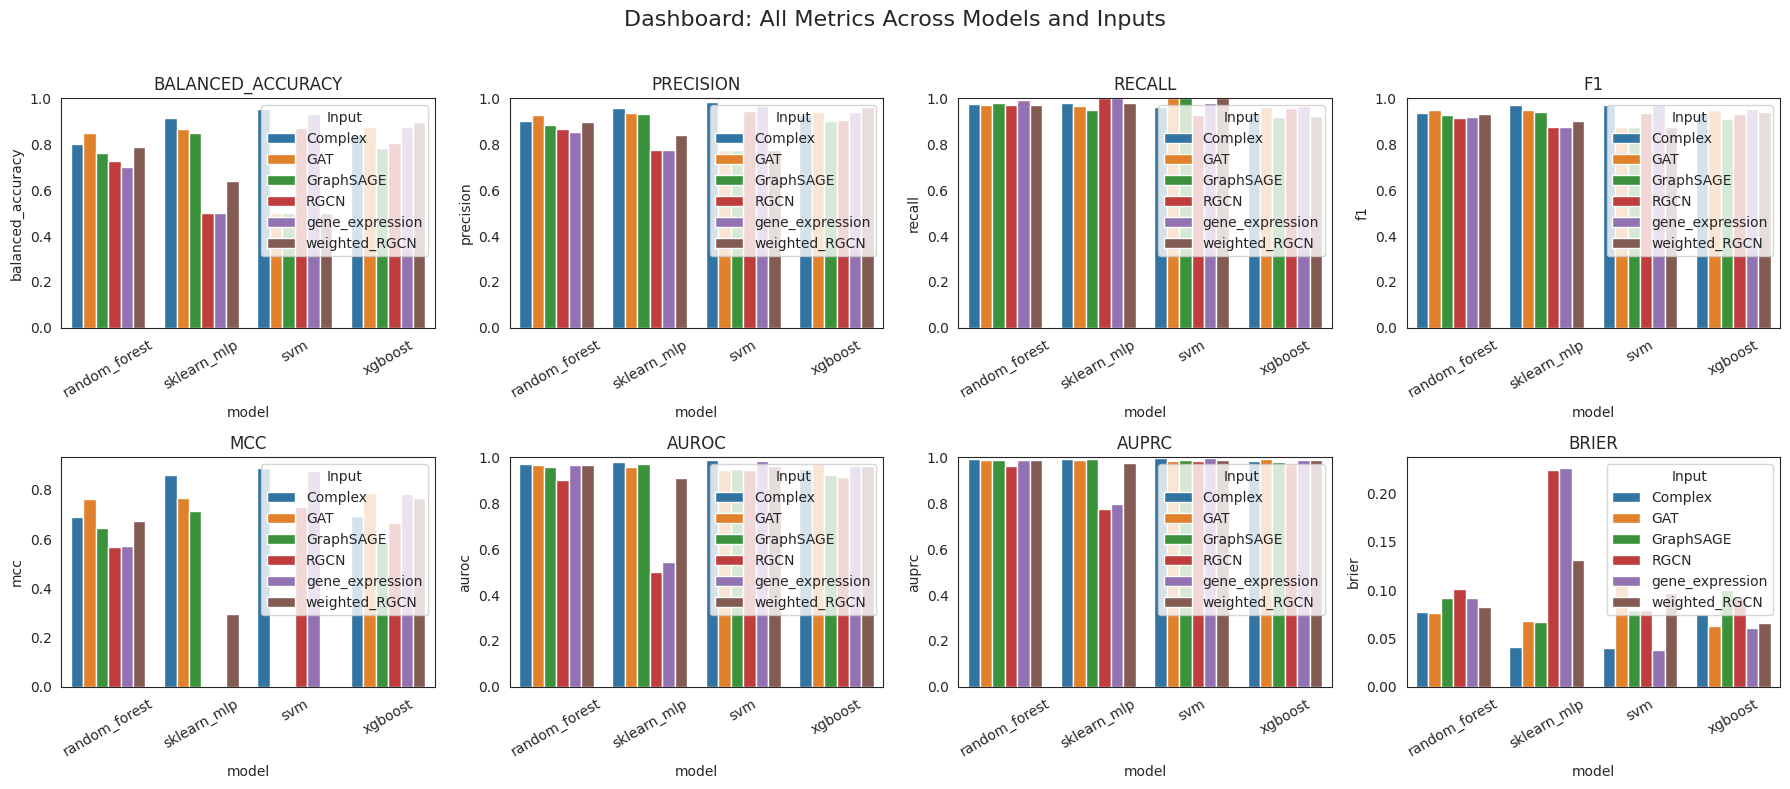

In [21]:
collector = ResultsCollector()
dashboard = DashboardVisualizer(filtered_results, collector)
dashboard.plot_metric_grid()